## Review [20 Min]

1. See Sep27 TUT and Sep30 LEC


## Demo [40 min] <!-- Expanding on: Project: Vaccine Data -->

<!-- ## Demo STA130 Tutorial 4 and a half: Hypothesis Testing-->

|<img src="https://pictures.abebooks.com/inventory/md/md31377899338.jpg" alt="Scientific Revolusions" style="width: 300px; height: 450px;"/>|<img src="https://i.ytimg.com/vi/Yn8cCDtVd5w/maxresdefault.jpg" alt="Kuhn Cycle" style="width: 800px; height: 450px;"/>|
|-|-|
| | |
> Scientific method: "Providing evidence against the current views". You have to provide evidence against the old hypothesis. You have to reject the old view before you can move on to a new view.

### Expanding on Vaccine Data Project from the last HW


In [1]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [ ]:
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)    

In [2]:
# first let's make this data similar to that of the video from the last homework
# https://www.youtube.com/watch?v=Xz0x-8-cgaQ
    
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore
# why do we do the subtraction in this order?
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


### Potential Null Hypothesis
$\Large H_0: \text{The vaccine has no effect }\textbf{[on average]}\text{ on patient health}\\
\Large H_1: H_0 \text{ is false}$

> #### Some "hidden" assumptions...
> Differences in the "before and after" `HealthScore` could be due to a lot of factors; but, if the only thing we did as an intervention was giving the patients the vaccine treatment, then we would expect the other factors to be a wash over time and just kind of average out... right?
> - Do we think something else could happen that would tend to generally increase everyone's health score after the initial measurement (besides our intervention)? 
>     - If so, this would be called a **confounder**... otherwise we're saying we have "**no confounding**"
> - Do we think we have a large enough sample size for "other factors" to "average away"? 
>     - Usually we consider increased sample size from the perspective of reducing standard error to reduce estimation uncertainty; but, this consideration suggests we should also be concerned with sample size from the perspective of "averaging away" **confounding imbalances**...

In [4]:
# Potential evidence against null hypothesis using confidence intervals

import numpy as np

# Bootstrapping
np.random.seed(130)  # experiment with this value
n_iterations = 1000 
n_size = len(patient_data)  # 10
bootstrap_means = np.zeros(1000)  # array to store bootstrapped means

for i in range(n_iterations):
    sample = patient_data.sample(n=n_size, replace=True)  # replace=True!!
    bootstrap_means[i] = np.mean(sample['HealthScoreChange'])  # bootstrapped mean

# Calculating the 95% confidence interval
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
ci_lower, ci_upper

(0.7975000000000002, 5.502499999999998)

### Quantifying "confidence" in $H_0$

- Since this "does not cover 0", we'd reject the null hypothesis on the basis of a 95% bootstrapped confidence interval
- This is all well and good, but (unfortunately) it's also quite common to give "evidence against" a null hypothesis in the form of a p-value
    - **The probability of a test statistic being as or more extreme than the observed test statistic if the null hypothesis was true**
    
### Simulation code calculating p-value 
- We can compute this p-value using simulation, based on the parameteric assumption of the health scores being normally distributed (this should be clarified in the null hypothesis)    


### Revised Null Hypothesis
$\Large H_0: \text{The vaccine has no effect }\textbf{[on average]}\text{ on patient health}\\
\quad\quad\quad \bullet \text{We'll assume the "HeatlhScoreChange" data is normally distributed with population mean }\mu=0\\
\quad\quad\quad \bullet \text{We don't know the standard deviation of this normal population}\\ 
\quad\quad\quad \bullet \text{but we'll use a plug in estimate based on our observed sample}\\
\quad\quad\quad \bullet \text{(which is frequently what is done in such contexts)}\\
\quad\quad\quad \bullet \text{[and we're still assuming the "no confounding" considerations from above...]}\\
\Large H_1: H_0 \text{ is false}$


In [57]:
#np.random.seed(130)  # make simulation reproducible
n_iterations = 1000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
plugin_std = patient_data.HealthScoreChange.std()
HealthScoreChange_simulationsUnder_h0 = np.zeros(n_iterations)

# generate a hypothetical sample under h0 being true (i.e. vaccine has no effect)
for i in range(n_iterations):
    HealthScoreChange_simulationsUnder_h0[i] = \
    np.random.normal(loc=0, scale=plugin_std, size=n_size).mean()  # sample average
    # population under H0                     same sample size as original sample
                                            # so it's "apples to apples"

# Calculate the p-value - bootstrapped statistics (differences)
# under h0 that are greater than observed statistic (difference)
num_as_or_more_extreme = (abs(HealthScoreChange_simulationsUnder_h0) >= \
                          abs(patient_data.HealthScoreChange.mean())).sum()
p_value = num_as_or_more_extreme / n_iterations
p_value

0.014

In [68]:
print(str(num_as_or_more_extreme)+' out of ' +str(n_iterations)+' simulated statistics (under the null hypothesis) were "as or more extreme"\n\
compared to the observed test statistic of ' + str(patient_data.HealthScoreChange.mean()) + ' giving us a p-value of ' + str(p_value))

14 out of 1000 simulated statistics (under the null hypothesis) were "as or more extreme"
compared to the observed test statistic of 3.3 giving us a p-value of 0.014


### The meaning of quantificative p-values is actually qualitative...

- We do not prove $H_0$ false, we instead give evidence against the $H_0$
    - "We reject the null hypothesis with a p-value of abc, meaning we have xyz evidence against the null hypothesis"
- We do not prove $H_0$ is true, we instead do not have evidence to reject $H_0$
    - "We fail to reject the null hypothesis with a p-value of abc"

|p-value|Evidence|
|-|-|
|p>0.1|No evidence against the null hypothesis|
|0.1>p>0.05|Weak evidence against the null hypothesis|
|0.05>p>0.01|Moderate evidence against the null hypothesis|
|0.01>p>0.001|Strong evidence against the null hypothesis|
|0.001>p|Very strong evidence against the null hypothesis|



# Today's Agenda (5 minutes)

- Tutorial Activity: Stella McStat's "Wheel of Destiny"

    - **Parameters (of populations)** versus **Statistics (of samples)**
    - **Independent** Samples, **Sampling Distributions**, **p-values**, etc.

- Lecture/Example: Hypothesis test walk-through
    - Code Examples to facilite Terminology Explanation and Discussion
    - Evidence against the Null Hypothesis
    - Alternative form of **Sampling Distributions**, and "as or more extreme..."


- Tutorial Assignment: Mini-Homework Hypothesis Testing Practice


# Tutorial Activity: Stella McStat's Wheel of Destiny [29 min]

## The Wheel of Destiny (~1 minute) [Click "Down" next]

Stella McStat had been running a small-time gambling operation on campus for several months during her first year at UofT. It was disrupted during COVID, but now that courses seem to be reliably back to in-person formats, Stella is getting things back up and running. **Stella wants to determine if her game is "fair"** (even if somewhat illegal).

| <img src="https://i.postimg.cc/BvqJwBwc/stella2.png" style="height: 450px;"/> |  <img src="https://i.postimg.cc/vm3GRxJR/fair.png" style="height: 450px;"/> |
|-|-|
| | |

<sub><sup>Adapted from Lawton, L. (2009) An Exercise for Illustrating the Logic of Hypothesis Testing, Journal of Stat. Education, 17(2).</sup></sub>


## The Wheel of Destiny (~1 minute) [Click "Down" next]

For each spin of the wheel, two gamblers take part. For a toonie each (\\$2 Canadian), Stella sells one a red ticket and one a black ticket  (i.e., total \\$4). Then Stella spins the Wheel of Destiny. The person who holds the colour on which the spinner stops gets \\$3.50 (Stella keeps \\$0.50 per spin for running the game and providing snacks).

| <img src="https://i.postimg.cc/BvqJwBwc/stella2.png" style="height: 450px;"/> |  <img src="https://i.postimg.cc/vm3GRxJR/fair.png" style="height: 450px;"/> |
|-|-|
| | |

<sub><sup>Adapted from Lawton, L. (2009) An Exercise for Illustrating the Logic of Hypothesis Testing, Journal of Stat. Education, 17(2).</sup></sub>


## The Wheel of Destiny (~1 minute) [Click "Down" next]


Stella just bought a new spinner, the critical piece of equipment for this game. She's heard some mixed reviews about the manufacturer she has purchased from. Before she beings using this spinner, she wants to make sure that it is, in fact, fair—she wants both colours to come up equally often. Because of the set-up of the game, Stella has no incentive to cheat and wants the game to be as fair as possible.

| <img src="https://i.postimg.cc/BvqJwBwc/stella2.png" style="height: 450px;"/> |  <img src="https://i.postimg.cc/vm3GRxJR/fair.png" style="height: 450px;"/> |
|-|-|
| | |

<sub><sup>Adapted from Lawton, L. (2009) An Exercise for Illustrating the Logic of Hypothesis Testing, Journal of Stat. Education, 17(2).</sup></sub>


## The Wheel of Destiny (~1 minute) 


Everything Stella can examine about the wheel seems fine; there is the same number of sectors of each colour and they each have the same area. BUT! Stella has a great idea and decides to come to YOU, her statistical guru, and ask you to verify that the new spinner is fit to use.

| <img src="https://i.postimg.cc/BvqJwBwc/stella2.png" style="height: 450px;"/> |  <img src="https://i.postimg.cc/vm3GRxJR/fair.png" style="height: 450px;"/> |
|-|-|
| | |

<sub><sup>Adapted from Lawton, L. (2009) An Exercise for Illustrating the Logic of Hypothesis Testing, Journal of Stat. Education, 17(2).</sup></sub>


## Communication  [25 minutes] [Click "down" next]
[1min] Break into 5 new groups of 4-5, assigning each group to one of the questions. \
Consider allowing students to preferentially select which group they join by calling for volunteers for each prompt.]

[8min] Groups discuss questions

[3min each] Groups (in order) provide their answer to the class.

1.How can we examine the wheel for fairness?
- What is the difference between a **null hypothesis** and an **alternative hypothesis**? 
- What is a **null hypothesis** here? 
- What is the **alternative hypothesis** here? As simple as possible?
    
2.What's "data" here? 
- What is a **sample** here? Hint: the **population** would be every spin result ever 
- What is the difference between a **parameter** and a **statistic**?
- What is the difference between a **dependent** and **independent** sample?

3.How can we provide evidence with a **confidence interval**?
- How does changing the **confidence level** (e.g., from 95% to 99%) affect the width of the **confidence interval** for the proportion of red outcomes?
- What statistic should we create a **confidence interval** for?
- How can you use the **confidence interval** to make a decision about the **null hypothesis** that the wheel is fair?

4.How can we provide evidence with a **p-value**?
- What is the definition of a **p-value**?
- Suppose you obtained a p-value of 0.07. How would you interpret this result in the context of determining if the wheel is fair?
- Why is it incorrect to say that a p-value of 0.01 means there is a 99% probability that the null hypothesis is false?

5.How could we go about conducting a simulation-based hypothesis test here?
- Describe the process of using simulation to calculate a p-value for this problem

# Communication [25 minutes]

[1min] Break into 5 new groups of 4-5.

[8min] Discuss 1-2 topics of your choice that a portion of your group members doesn't understand. The group members that understand can explain the concept or use **Chat** as a group to better understand the topic.

[3min each] Groups provide a short presentation to the class of:
1. What the topic is and what element they were confused about
2. An explanation/summary that will clear up everyones questions about that topic forever!

### p-values: Different Sampling Distributions (10 minutes) [Click "down" for the next few slides]

- Compare and contrast the figures on the next three sides<br>[and don't worry about the code so much]:
    - Simulated (**nonparametric**) Sampling Distribution
    - Theoretical **nonparametric** Binomial Distribution 
        - Only assumption used is the $p=0.5$ parameter value assumption of the null hypothesis (and spin **independence** so spins don't affect each other)
        - [**This "No Distributional Assumption" is called *nonparametric***...]
    - Approximate **parametric** t-test (assumes Normally Distributed data)
        - Assuming data is Normally Distributed makes this **parametric** <br>(and the assumption here is wrong which makes it approximate) 
        - not the $p=0.5$ parameter value and **independence** assumptions

*You'll examine these different Sampling Distributions again in the Tutorial Assignment!*


**Importantly this code uses np.random.choice(['Red', 'Black'], p=[0.5, 0.5]) to create a sample.** [Click "down" next]

In [7]:
import pandas as pd; import plotly.express as px; import numpy as np
num_samples,sample_size = 1000,100; simulated_sample_proportions = []; np.random.seed(seed=1)
for i in range(num_samples):
    sample = np.random.choice(['Red', 'Black'], size=sample_size, p=[0.5, 0.5], replace=True)
    simulated_sample_proportions += [(sample == 'Red').sum() / sample_size]
observed_test_stat=0.54; num_as_or_more_extreme = \
  (abs(np.array(simulated_sample_proportions) - 0.5) >= abs(observed_test_stat - 0.5)).sum()
p_value = num_as_or_more_extreme / num_samples
print(str(num_as_or_more_extreme)+' out of ' +str(num_samples)+' simulated statistics were "as or more extreme" (relative to the Null Hypothesis\nassumed p=0.5 parameter value) than the observed test statistic of ' + str(observed_test_stat) + ' giving us a p-value of ' + str(p_value))
fig = px.histogram(pd.DataFrame({'Proportion of spins that are Red': simulated_sample_proportions}), #nbins=100,
                   title=str(num_samples)+' draws from the Sampling Distribution of the "Proportion of Red" (for a sample of size n='+str(sample_size)+' spins)', x='Proportion of spins that are Red')
fig.add_vline(x=observed_test_stat, line_dash="dash", line_color="black", annotation_text="observed_test_stat ("+str(observed_test_stat)+")"); fig.show()

459 out of 1000 simulated statistics were "as or more extreme" (relative to the Null Hypothesis
assumed p=0.5 parameter value) than the observed test statistic of 0.54 giving us a p-value of 0.459


**Importantly this code uses stats.binom(n=sample_size, p=0.5).pmf(x) to create a sample.** [Click "down" next]

In [8]:
# Theoretically Exact (Binomial) Sampling Distribution
from scipy import stats; x=np.arange(0,100); sample_size=100; prob=stats.binom(n=sample_size, p=0.5).pmf(x) # setup for binomial distribution
fig = px.bar(pd.DataFrame({'$\hat p$':x/sample_size,'probability':prob}), x='$\hat p$', y='probability',
                title='$\\text{Theoretically Exact (Binomial) Sampling Distribution of } p_r \\text{ assuming "}H_0 \\text{: 50-50 chance of red"}$')
fig.add_vline(x=observed_test_stat, line_dash="dash", line_color="black",
              annotation_text="observed_test_stat ("+str(observed_test_stat)+")")
# Theoretically Exact (Binomial) Sampling Distribution p-value calculation
p_value = (1-stats.binom(n=100, p=0.5).cdf(54-1))*2  # "two sided" p-value
# This calculates "as or more extreme" as the sum of all the probabilities (bin heights) that are located at 
# 54/100, 55/100, 56/100, ..., up to 100/100 (and then multiplies this sum by two since this distribution is symmetric)
print('Our theoretical p-value calculation based on the theoretical binomial distribution is ' + str(np.round(p_value, 5))); fig.show()
# uncomment `nbins=100` and set `num_samples=100000` in the previous histogram to see that
# the simulation estimates this Theoretically Exact (Binomial) Sampling Distribution...

Our theoretical p-value calculation based on the theoretical binomial distribution is 0.48412


**Importantly this code uses stats.norm(loc=0.5, scale=0.5\*100\*\*0.5).pdf(x) to create a sample.**

In [9]:
# Continuous Approximation to the Theoretical (Binomial) Sampling Distribution
np.random.seed(56); spins = 100; x = np.linspace(0,1,200); spin_results = np.random.choice(['Red', 'Black'], p=[0.51, 0.49], size=spins, replace=True)
n = len(spin_results); spin_results_numeric = np.where(spin_results == 'Red', 1, 0) # convert red spins to True/1 and black spins to False/0
dens = stats.t(loc=0.5, df=n-1, scale=np.std(spin_results_numeric, ddof=1)/n**0.5) # Another possible approximation could be based on `dens=stats.norm(loc=0.5, scale=0.5*100**0.5).pdf(x)`
# p-value calculations: "as or more extreme as" the area under the curve from 54/100 to 100/100 (and multiply this sum by two since this distribution is symmetric)
p_value = (1-dens.cdf(54/100))*2 # Area under the curve from 54/100 to 100/100 for the continuous approximation to the binomial distirbution
p_value2 = (1-dens.cdf((54-0.5)/100))*2 # The '-0.5' is an adjustment to the discontinuous ("probability bars") binomial distribution when approximating it as the continuous ("smooth line") normal distribution 
print('Approximate-theoretical parametric p-value calculation based on a continuous approximation of\nthe theoretical binomial distribution is ' 
      + str(np.round(p_value,5)) + ' ("continuity corrected" adjusted to ' + str(np.round(p_value2,5))+").")
print(stats.ttest_1samp(spin_results_numeric, .5)) # scipy has built in ttest function
fig = px.line(pd.DataFrame({'x':x, 'density':dens.pdf(x)}), x='x', y='density', title='$$\\text{Continuous Approximation to the Theoretical (Binomial) Sampling Distribution (under } H_0: p=0.5\\text{)}$$'); fig.add_vline(x=observed_test_stat, line_dash="dash", line_color="black", annotation_text="observed_test_stat ("+str(observed_test_stat)+")"); fig.show()

Approximate-theoretical parametric p-value calculation based on a continuous approximation of
the theoretical binomial distribution is 0.42646 ("continuity corrected" adjusted to 0.48636).
TtestResult(statistic=0.7985494095046912, pvalue=0.4264632540527483, df=99)


All the codes above run a simulation to estimate the distribution of sample proportions for a coin flip
scenario (50% chance of 'Red'), compare an observed proportion to this distribution, and calculate the
probability (p-value) of observing such a proportion by chance. The resulting plots help visualize how the
observed result compares to the simulated results. The differences are in the assumptions under the $h_0 /$null hypothesis and hence the random function they use to generate a sample.

## Types of Errors when dealing with $H_0$

### Type I Error (α)
- **Definition**: A Type I error occurs when the null hypothesis $H_0$ is true, but we mistakenly reject it. This is also known as a "false positive" error.
- **Example**:
  - Suppose a pharmaceutical company tests a new drug to determine if it is more effective than a placebo. The null hypothesis $H_0$ is that the new drug is no more effective than the placebo.
  - If the test results lead to rejecting $H_0$, but in reality, the drug is no more effective than the placebo, a Type I error has been made.
- **Consequences**: Type I errors can lead to incorrect conclusions, such as believing an ineffective treatment works.

### Type II Error (β)
- **Definition**: A Type II error occurs when the null hypothesis $H_0$ is false, but we fail to reject it. This is also known as a "false negative" error.
- **Example**:
  - Consider the same pharmaceutical company testing a new drug. The null hypothesis $H_0$ is that the drug is no more effective than the placebo, and the alternative hypothesis $H_1$ is that the drug is more effective.
  - If the test results lead to not rejecting $H_0$, but the drug is actually more effective than the placebo, a Type II error has occurred.
- **Consequences**: Type II errors can result in missed opportunities, such as not recognizing a beneficial treatment.

**Adjusting the p-value threshold i.e. 0.05 changes the balance between minimizing Type I errors and Minimizing Type II errors. Higher threshold increases risk of Type I, but decreases risk of Type II, and vice-versa.**

### Prelecture  HW 

- Watch [this video](https://www.youtube.com/watch?v=ZzeXCKd5a18) discussing "What is a hypothesis?"
> It's perhaps interesting to consider that a "Trump versus Biden" analog of the presidential comparisions in the video does have some data available... in some ways it is both a "Obama versus Bush" *and* a "Hillary versus Trump" question...


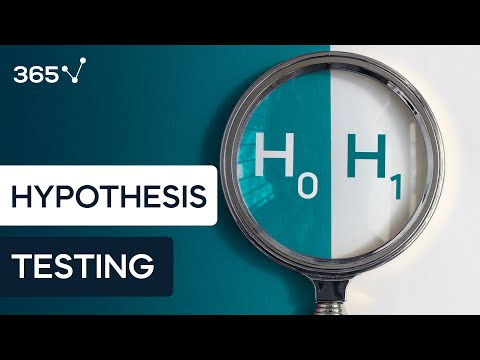

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

- Watch [this video](https://www.youtube.com/watch?v=9jW9G8MO4PQ) discusssing "What is a p-value?"
> This is intended to help you initially make more sense of the technical definition of a p-value, **the probability of a test statistic being as or more extreme than the observed test statistic if the nulll hypothesis was true**
>
> The thing is though, once you understand a p-value is, then you'll see how simple and elegant the above definition is... So, your objective in learning what a p-value is should be to be able to read and understand the definition of a p-value given above effortlessly... That way you can communicate with the language of statistical reasoning in 3.5 seconds rather than 3.5 minutes...





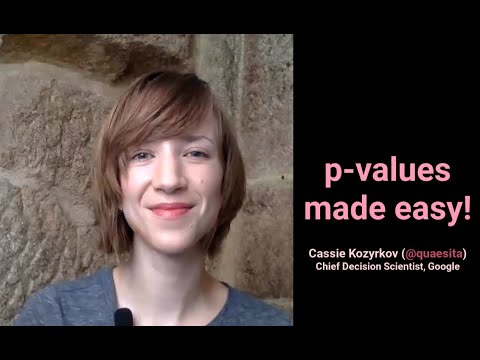

In [4]:
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

# Midterm Review with Chat [30 minutes]

Demonstrate using [ChatGPT](https://chat.openai.com/) to clarify material studied in class:
- pandas, NaNs, summarize, groupby
- coding demonstrated with the Monte Hall problem and Markov chatbots	
- plotly bar, hist, box, etc.
- Bootstrapping